# Импорт

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [4]:
data = pd.read_csv('../../Data/DataLaba2/neo_task_smoted.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop('hazardous', axis=1), data['hazardous'], test_size=0.25, random_state=42)
X_train.shape


(122994, 4)

In [ ]:
data

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,-0.999187,-0.528599,-0.972789,0.407593,0.0
1,-0.998421,-0.935292,-0.126239,0.290780,0.0
2,-0.997101,-0.534989,0.748307,0.182311,0.0
3,-0.999016,-0.650926,-0.663033,0.374218,0.0
4,-0.992669,-0.430407,0.906601,0.015436,0.0
...,...,...,...,...,...
163987,-0.994367,-0.604209,-0.841236,0.062991,1.0
163988,-0.993778,-0.757087,-0.160396,0.045115,1.0
163989,-0.989685,-0.114495,-0.067884,-0.046048,1.0
163990,-0.986634,-0.067341,0.716200,-0.093033,1.0


# Подбираем гиппер-параметры.

In [5]:
decision_tree_classifier_optimal_params = GridSearchCV(DecisionTreeClassifier(), 
                                                       {
                                                        'criterion': ["gini", "entropy", "log_loss"],
                                                        'max_depth': np.array(range(1, 2*X_train.shape[1]+1)),
                                                        # 'min_samples_split': np.array(range(2, X_train.shape[0]//2))
                                                        },
                                                        cv=2,
                                                        n_jobs=3,
                                                        scoring='accuracy'
                                            ).fit(X_train, y_train)
decision_tree_classifier_optimal_params.best_params_

{'criterion': 'gini', 'max_depth': 8}

# Обучение

In [6]:
decision_tree_classifier = DecisionTreeClassifier(
    criterion=decision_tree_classifier_optimal_params.best_params_['criterion'] if 'criterion' in decision_tree_classifier_optimal_params.best_params_ else 'gini',
    max_depth=decision_tree_classifier_optimal_params.best_params_['max_depth'] if 'max_depth' in decision_tree_classifier_optimal_params.best_params_ else None,
    )
decision_tree_classifier.fit(X_train, y_train)

In [7]:
print(tree.export_text(decision_tree_classifier))

|--- feature_0 <= -0.99
|   |--- feature_0 <= -0.99
|   |   |--- feature_0 <= -1.00
|   |   |   |--- feature_3 <= 0.10
|   |   |   |   |--- feature_2 <= -0.60
|   |   |   |   |   |--- feature_2 <= -0.60
|   |   |   |   |   |   |--- feature_1 <= -0.56
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_1 >  -0.56
|   |   |   |   |   |   |   |--- feature_1 <= -0.56
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- feature_1 >  -0.56
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  -0.60
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_2 >  -0.60
|   |   |   |   |   |--- feature_2 <= 0.71
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_2 >  0.71
|   |   |   |   |   |   |--- feature_2 <= 0.71
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_2 >  0.71
|   |   |   |   |   |   |   |--- feature_1 <= -0.59
|   |   |   |   |

[Text(0.3749146174863388, 0.9444444444444444, 'h <= -0.995\ngini = 0.5\nsamples = 122994\nvalue = [61622, 61372]'),
 Text(0.12670765027322403, 0.8333333333333334, 'h <= -0.995\ngini = 0.006\nsamples = 46104\nvalue = [45968, 136]'),
 Text(0.04918032786885246, 0.7222222222222222, 'h <= -0.995\ngini = 0.001\nsamples = 45303\nvalue = [45281, 22]'),
 Text(0.03278688524590164, 0.6111111111111112, 'a <= 0.099\ngini = 0.0\nsamples = 44525\nvalue = [44518, 7]'),
 Text(0.0273224043715847, 0.5, 'z <= -0.602\ngini = 0.011\nsamples = 1259\nvalue = [1252, 7]'),
 Text(0.01639344262295082, 0.3888888888888889, 'z <= -0.605\ngini = 0.048\nsamples = 162\nvalue = [158, 4]'),
 Text(0.01092896174863388, 0.2777777777777778, 'a <= -0.562\ngini = 0.037\nsamples = 161\nvalue = [158, 3]'),
 Text(0.00546448087431694, 0.16666666666666666, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.01639344262295082, 0.16666666666666666, 'a <= -0.561\ngini = 0.101\nsamples = 56\nvalue = [53, 3]'),
 Text(0.0109289617486

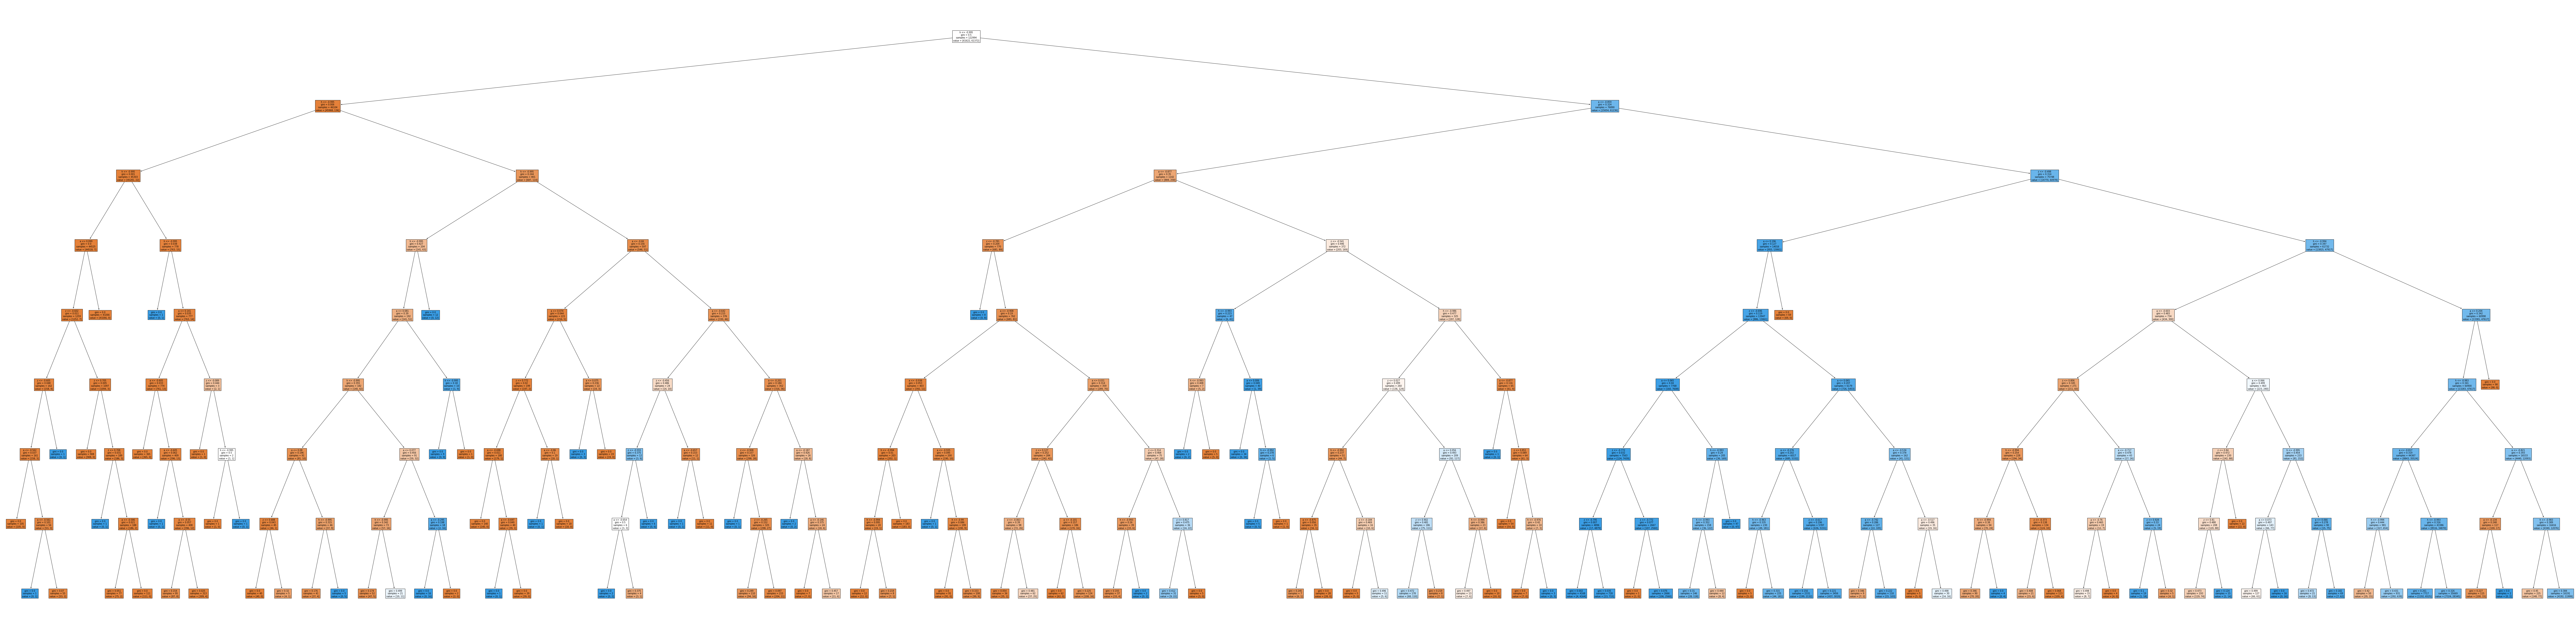

In [8]:
plt.figure(figsize=(200,50))
tree.plot_tree(decision_tree_classifier, feature_names='hazardous', filled=True)

## Оценка качества 

In [13]:
y_predicted = decision_tree_classifier.predict(X_test)
y_predicted

array([1., 0., 1., ..., 0., 1., 1.])

In [14]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted))

Accuracy
0.8804819747304746


In [15]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted))

Confusion matrix
[[15631  4743]
 [  157 20467]]


In [16]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.99      0.77      0.86     20374
         1.0       0.81      0.99      0.89     20624

    accuracy                           0.88     40998
   macro avg       0.90      0.88      0.88     40998
weighted avg       0.90      0.88      0.88     40998



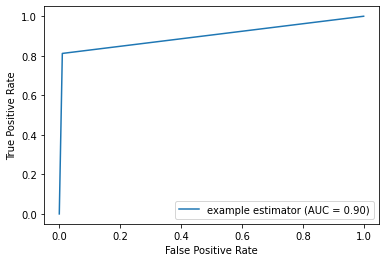

In [17]:
fpr, tpr, thresholds = roc_curve(y_predicted, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()